In [1]:
import cv2
import numpy as np
import glob


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
def calibrate_camera(objpoints, imgpoints, calibration_image):
    img_size = (img.shape[1], img.shape[0])
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    
    return (ret, mtx, dist, rvecs, tvecs)  

def undistort_image(image, mtx, dist):    
    undistorted_image = cv2.undistort(image, mtx, dist, None, mtx)
    return undistorted_image

def plot_two_images_side_by_side(image1, image2, title1, title2, cmap):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(cv2.cvtColor(image1, cmap))
    ax1.set_title(title1, fontsize=30)
    ax2.imshow(cv2.cvtColor(image2, cmap))
    ax2.set_title(title2, fontsize=30)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [4]:
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)

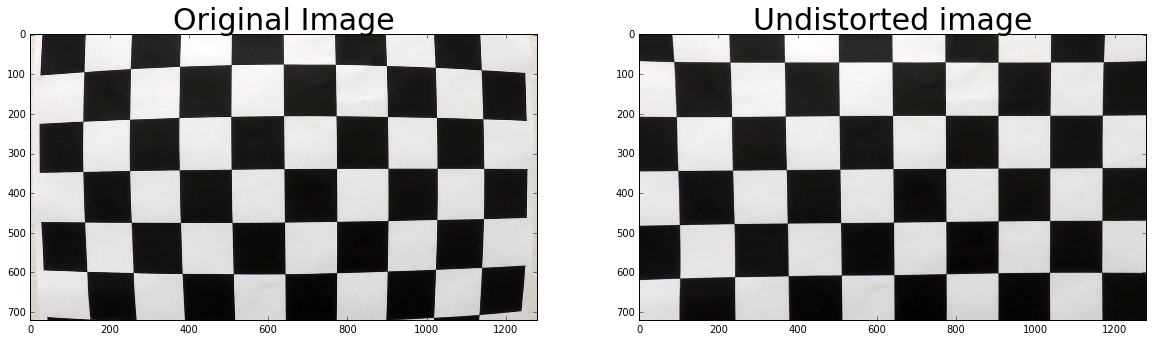

In [13]:
calib_image_name = 'camera_cal/calibration1.jpg'      
ret, mtx, dist, rvecs, tvecs = calibrate_camera(objpoints, imgpoints, calib_image_name)
img = cv2.imread(calib_image_name)
undistort_img = undistort_image(img, mtx, dist) 
plot_two_images_side_by_side(img, undistort_img, 'Original Image', 'Undistorted image', cv2.COLOR_BGR2RGB)

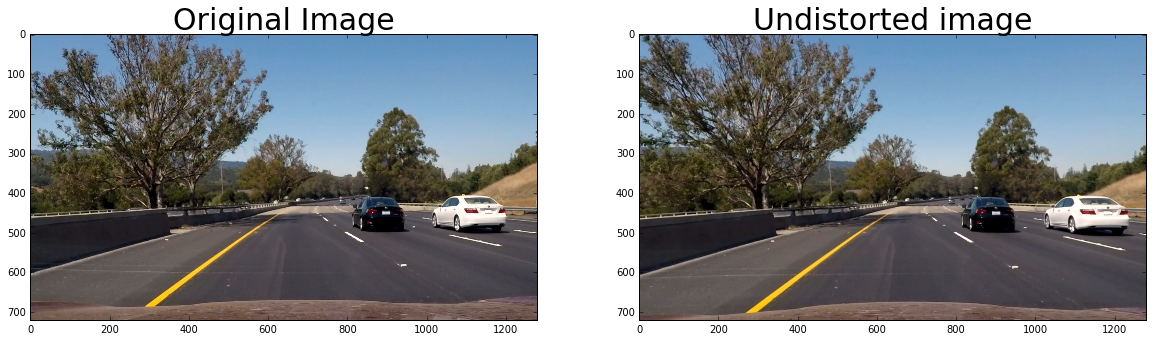

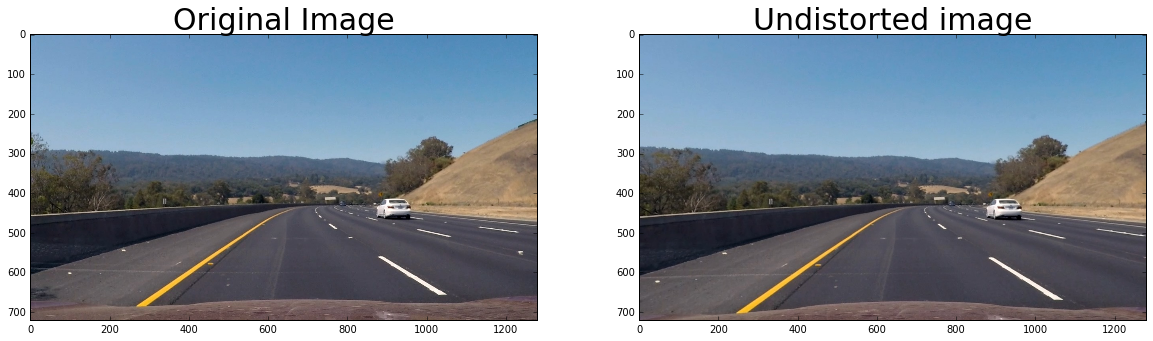

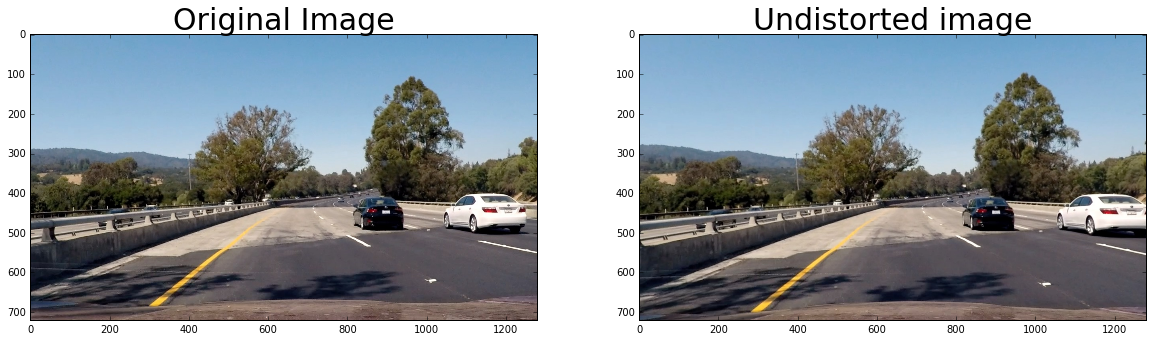

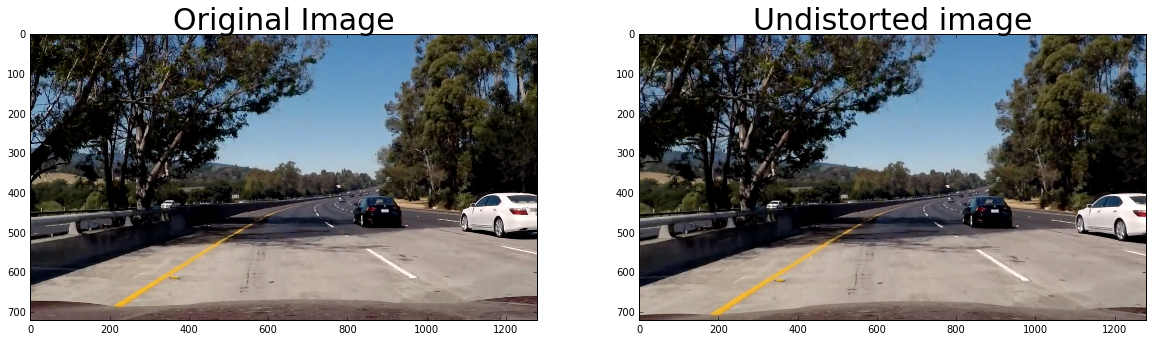

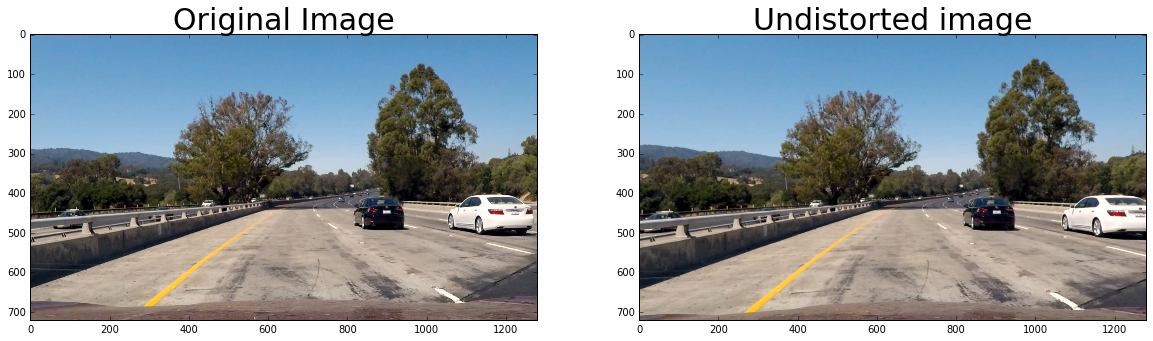

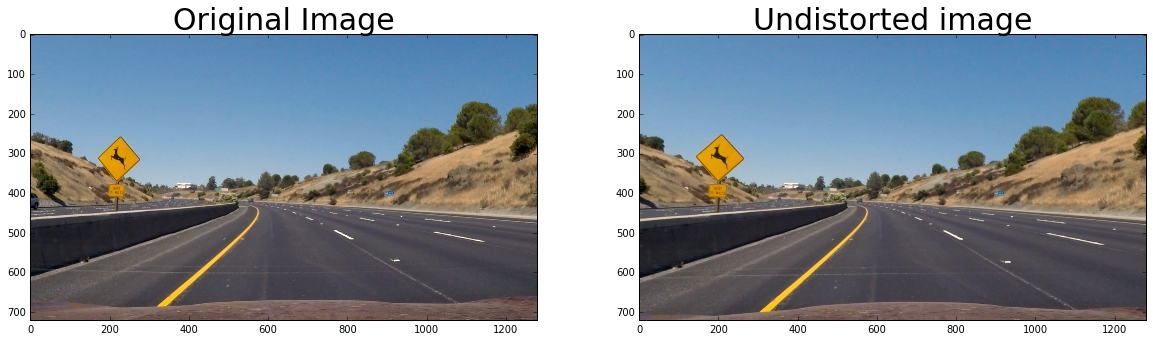

In [15]:
images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    image = cv2.imread(fname)
    undistorted_image = undistort_image(image, mtx, dist)
    plot_two_images_side_by_side(image, undistorted_image, 'Original Image', 'Undistorted image', cv2.COLOR_BGR2RGB)

In [22]:
#1181,376,1215,374,1183,403,1216,403
# Use the OpenCV undistort() function to remove distortion
def warp_perspective(undistored_image):
        img_size = (undistored_image.shape[1], undistored_image.shape[0])
        src = np.float32([[490, 482],[810, 482],
                      [1250, 720],[40, 720]])
        dst = np.float32([[0, 0], [1280, 0], 
                     [1280, 720],[0, 720]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undistored_image, M, img_size)

        # Return the resulting image and matrix
        return warped, M

(720, 1280, 3)


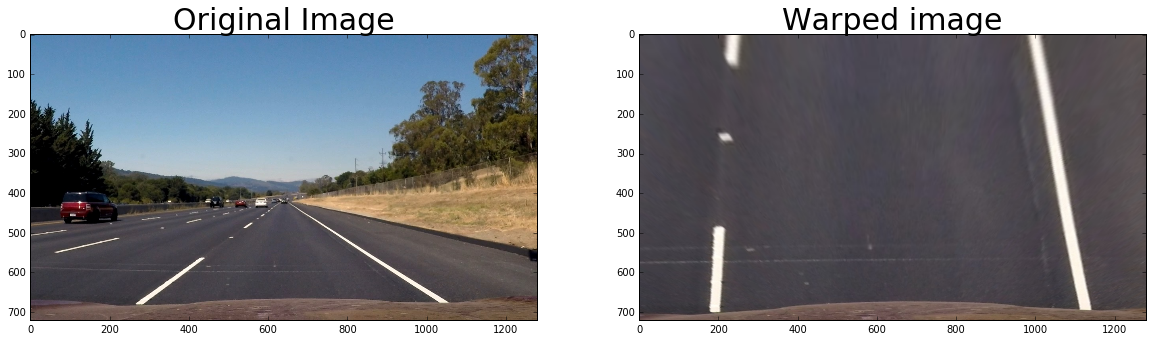

In [23]:

calib_image_name = 'test_images/straight_lines2.jpg'
image = cv2.imread(calib_image_name)
print(image.shape)
undistort_img = undistort_image(image, mtx, dist)
warped_image, M = warp_perspective(undistort_img)
plot_two_images_side_by_side(image, warped_image, 'Original Image', 'Warped image', cv2.COLOR_BGR2RGB)